In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import OrderedDict
from common import NWSL, Fonts, Images

In [2]:
df = pd.read_csv("2022_schedule.csv")
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df

,date,time,home,away
0,2022-04-29,19:30:00,LA,NC
1,2022-04-30,15:00:00,POR,KC
2,2022-04-30,19:00:00,CHI,LOU
3,2022-05-01,17:00:00,WAS,RGN
4,2022-05-01,18:00:00,HOU,SD
...,...,...,...,...
132,2022-10-16,16:00:00,HOU,KC
133,2022-10-16,19:00:00,SD,CHI
134,2022-10-23,14:00:00,POR,SD
135,2022-10-23,16:30:00,RGN,KC


In [3]:
buckets = [(0, 4), (5, 6), (7, 60)]

results = {}
for team in df.home.unique():
    games = df[(df["home"] == team) | (df["away"] == team)]
    gaps = list(
        sorted([x.days for x in games.date.diff().tolist()[1:]]),
    )

    count = []
    for low, high in buckets:
        count.append(len(list(filter(lambda x: x >= low and x <= high, gaps))))
    results[team] = count

results = OrderedDict(sorted(results.items(), key=lambda i: i[1][0] * 10 + i[1][1]))
results

OrderedDict([('HOU', [2, 6, 14]),
             ('ORL', [3, 7, 11]),
             ('KC', [3, 7, 14]),
             ('NJY', [4, 4, 13]),
             ('SD', [4, 6, 13]),
             ('RGN', [5, 4, 13]),
             ('CHI', [5, 5, 12]),
             ('POR', [5, 7, 11]),
             ('LOU', [5, 7, 9]),
             ('LA', [6, 3, 12]),
             ('NC', [7, 3, 11]),
             ('WAS', [7, 5, 9])])

In [4]:
labels = list([NWSL.name(i) for i in results.keys()])
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap("Blues_r")(np.linspace(0.15, 0.85, data.shape[1]))

<Figure size 1728x972 with 0 Axes>

<Figure size 28800x16200 with 0 Axes>

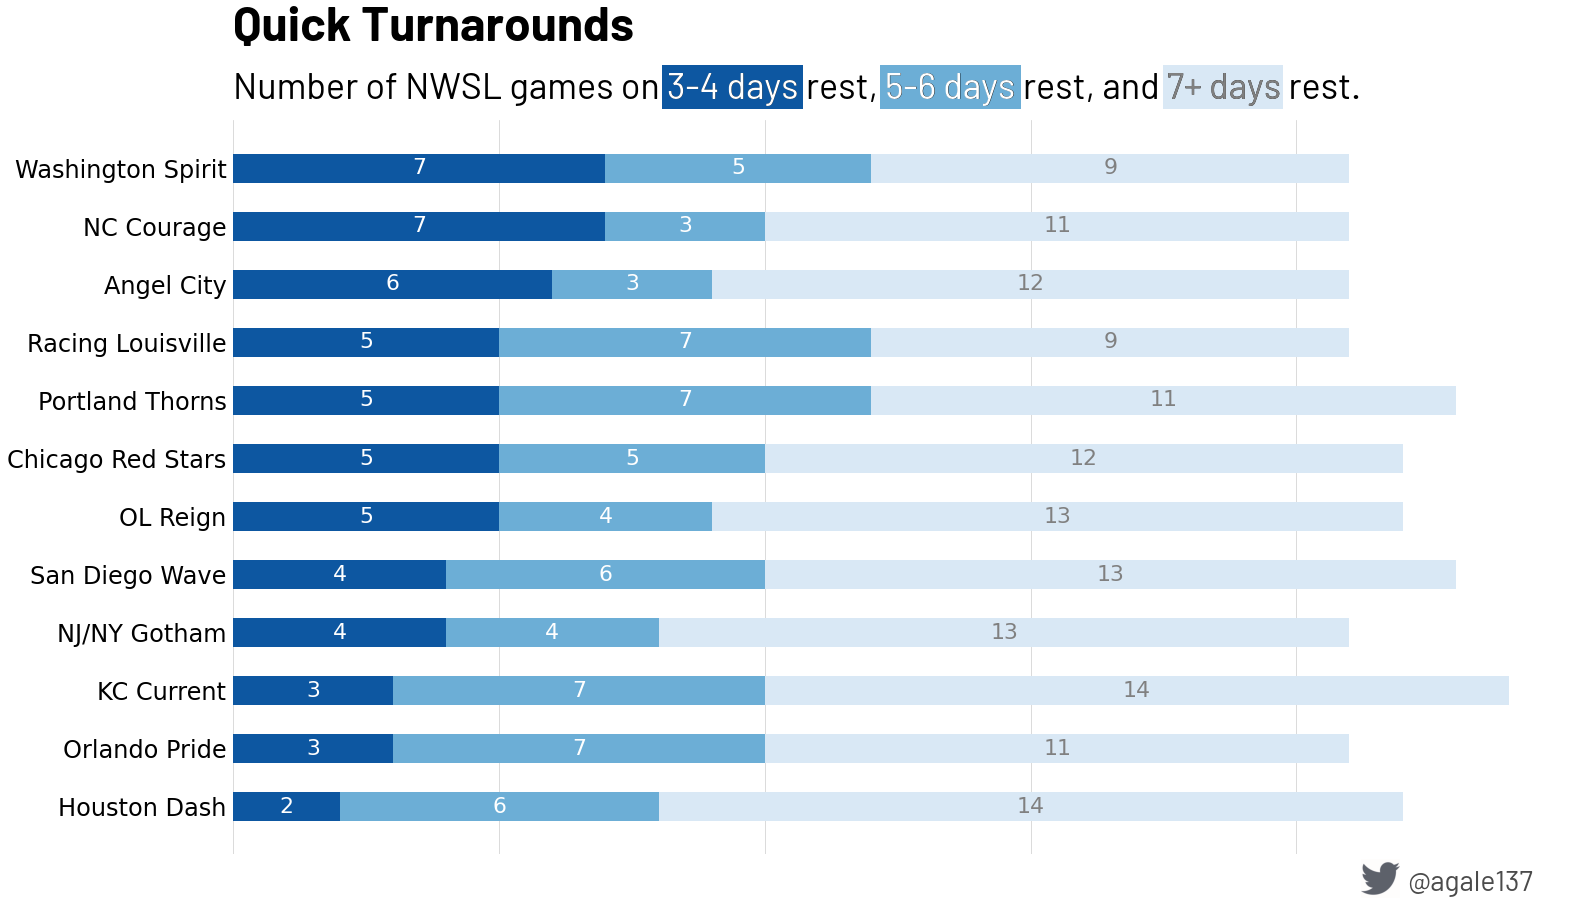

In [10]:
plt.clf()
plt.rcParams["figure.figsize"] = (24, 13.5)
plt.figure(dpi=1200)
fig, ax = plt.subplots()

# Title
plt.title(
    "Quick Turnarounds",
    fontproperties=Fonts.BARLOW_BOLD,
    size=48,
    x=0,
    y=1.1,
    ha="left",
)

# Subtitle
fig.text(
    0,
    1.03,
    "Number of NWSL games on 3-4 days rest, 5-6 days rest, and 7+ days rest.",
    fontproperties=Fonts.BARLOW,
    size=36,
    transform=ax.transAxes,
    ha="left",
)

fig.patches.append(
    patches.Rectangle(
        (0.32, 1.015),
        0.105,
        0.06,
        edgecolor="none",
        facecolor=category_colors[0],
        transform=ax.transAxes,
    )
)
fig.text(
    0.324,
    1.03,
    "3-4 days",
    fontproperties=Fonts.BARLOW,
    size=36,
    color="white",
    transform=ax.transAxes,
    ha="left",
)
fig.patches.append(
    patches.Rectangle(
        (0.483, 1.015),
        0.105,
        0.06,
        edgecolor="none",
        facecolor=category_colors[1],
        transform=ax.transAxes,
    )
)
fig.text(
    0.4868,
    1.03,
    "5-6 days",
    fontproperties=Fonts.BARLOW,
    size=36,
    color="white",
    transform=ax.transAxes,
    ha="left",
)
fig.patches.append(
    patches.Rectangle(
        (0.694, 1.015),
        0.09,
        0.06,
        edgecolor="none",
        facecolor=category_colors[2],
        transform=ax.transAxes,
    )
)
fig.text(
    0.6972,
    1.03,
    "7+ days",
    fontproperties=Fonts.BARLOW,
    size=36,
    color="grey",
    transform=ax.transAxes,
    ha="left",
)

# Plot data
for i, (colname, color) in enumerate(zip(range(0, 5), category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    rects = ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)

    xcenters = starts + widths / 2

    r, g, b, _ = color
    text_color = "white" if r * g * b < 0.4 else "grey"
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        if c > 0:
            ax.text(
                x, y, str(int(c)), ha="center", va="center", color=text_color, size=22
            )

# General
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Axes
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.xaxis.grid(True, color="lightgray")
ax.tick_params(axis="y", which="major", labelsize=24)
ax.tick_params(axis="x", which="major", labelsize=24, labelcolor="grey")
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_axisbelow(True)

# Twitter logo and username
plt.text(
    0.97,
    -0.04,
    "@agale137",
    transform=ax.transAxes,
    color="black",
    fontsize=28,
    alpha=0.7,
    fontproperties=Fonts.BARLOW,
    va="center",
    ha="right",
)
newax = fig.add_axes([0.76, 0.08, 0.04, 0.04], anchor="SE", zorder=1)
newax.imshow(Images.TWITTER)
newax.axis("off")

# Save image
plt.savefig("2022_gaps.png", bbox_inches="tight", pad_inches=0.5)